In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('laptop_price.csv',encoding="latin-1")

In [93]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year of sale,month of sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02


###### 1.1 Создать новый признак Cpu_Company, который будет содержать только название фирмы, которая произвела CPU
###### 1.2 Создать новый признак Memory_Amount, который будет содержать только количество Gb памяти без указания типа носителя
###### 1.3 Создать новый признак Memory_Type, который будет содержать только тип носителя (HDD/SDD/др.)
###### 1.4 Удалите признаки Memory и ScreenResolution


In [100]:
# def company(x):
#     result = x.split()
#     return result[0]
  
# df['Cpu_Company'] = df['Cpu'].apply(company)

df['Cpu_Company'] = df['Cpu'].apply(lambda x:x.split()[0])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel


In [101]:
def values_iterr(arg:str):
    arg = arg.split()
    result = 0
    for i in arg:
        if i.endswith('GB') and i[:-2].isdigit():
            result += int(i[:-2])
        elif i.endswith('TB') and i[:-2].isdigit():
             result += int(i[:-2])*1024
    return result          
            
values = ['128GB SSD + 1TB HDD','1TB HDD','256GB SSD']
# print(values_iterr(values[2]))
df["Memory_Amount"] = df["Memory"].apply(values_iterr)
df.sample(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount
183,187,Toshiba,Satellite Pro,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.0kg,793.0,Intel,128
925,939,Dell,Latitude 3580,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,729.9,Intel,500
169,173,HP,ProBook 430,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49kg,754.0,Intel,500
155,158,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6GB,256GB SSD,AMD Radeon 520,Windows 10,1.91kg,619.0,Intel,256


In [102]:
def mem(arg:str):
    res = []
    if 'SSD' in arg:
        res.append('SSD')
    if 'HDD' in arg:
        res.append('HDD') 
    if not res :
        return "other"
    return '/'.join(res)

df["Memory_Type"] = df["Memory"].apply(mem)
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
1050,1064,Lenovo,ThinkPad X1,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.1kg,2620.00,Intel,256,SSD
588,595,Lenovo,Ideapad 320-15IKBR,Notebook,15.6,Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.2kg,609.00,Intel,1024,HDD
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,Intel,512,SSD
166,170,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2.1kg,363.51,Intel,1024,HDD
137,140,Asus,FX753VD-GC086T (i5-7300HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,938.00,Intel,1152,SSD/HDD
1238,1256,MSI,GL62 6QF,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.3kg,1169.00,Intel,1152,SSD/HDD
839,848,Asus,R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,128GB HDD,Intel HD Graphics 620,Windows 10,2.3kg,590.00,Intel,128,HDD
542,549,HP,Envy 13-AB020nr,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg,1145.00,Intel,256,SSD
896,908,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62kg,929.00,Intel,1024,HDD
430,437,Samsung,Chromebook 3,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15kg,269.00,Intel,16,other


In [103]:
b = df.drop(columns=['Memory', 'ScreenResolution'])
b

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,other
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.8kg,638.00,Intel,128,SSD
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,Intel,512,SSD
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.5kg,229.00,Intel,64,other
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,Intel,1024,HDD


2.1 Создайте признак SSD, который изначально равен 0
2.2 Поставьте в признаке SSD 1, если ноутбук действительно с типом носителя SSD
2.3 Уберите в признаке Weight значения 'kg' и поменяйте его тип данных на вещественный


In [105]:
# # df['SSD'] = 0
# # df['SSD'] = df['Memory_Type'].apply(lambda x : 1 if 'SSD' in x else 0 )
# # df .sample(10)
# # def wei_kg (arg:str):
# #     st = []
# #     if arg.endswith('kg'):
# #         st.append(arg.replace('kg',''))
# #     else:
# #         return arg
# #     return st[0]

# df['Weight'] = df["Weight"].apply(wei_kg)
# df['Weight'] = df["Weight"].str.replace('kg','')


NameError: name 'wei_kg' is not defined

In [106]:
df["Weight"] = df["Weight"].astype('float')
df["Weight"].dtype

dtype('float64')

In [107]:
# Создайте датафрейм с клиентами:
clients = pd.DataFrame({
    'client_id': [45, 32, 67, 33, 43],
    'laptop_id': [506, 398, 710, 120, 1999]
})
clients

,client_id,laptop_id
0,45,506
1,32,398
2,67,710
3,33,120
4,43,1999


3.1 Присоедините к таблице clients данные по ноутбукам через метод join
3.2 Присоедините к таблице clients данные по ноутбукам через метод merge


In [167]:
client_1 = clients.set_index('laptop_id')
laptop_id = df.set_index('laptop_ID')
client_1.join(laptop_id, how = 'inner').reset_index()

,index,client_id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,506,45,Lenovo,ThinkPad L570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,911.00,Intel,256,SSD,1
1,710,67,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8GB,1TB HDD,AMD Radeon R7,Windows 10,2.20,429.00,AMD,1024,HDD,0
2,120,33,Dell,Inspiron 7570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.16,1130.33,Intel,1280,SSD/HDD,1


In [170]:
new_df = clients.merge(df, left_on = 'laptop_id',right_on ="laptop_ID")
new_df

,client_id,laptop_id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,45,506,506,Lenovo,ThinkPad L570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,911.00,Intel,256,SSD,1
1,67,710,710,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8GB,1TB HDD,AMD Radeon R7,Windows 10,2.20,429.00,AMD,1024,HDD,0
2,33,120,120,Dell,Inspiron 7570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.16,1130.33,Intel,1280,SSD/HDD,1


Составьте несколько сводных таблиц
4.1 Найдите среднюю стоимость ноутбуков в зависимости от компании производителя
Отсортируйте от меньшей стоимости к большей
4.2 Найдите минимальную, среднюю и максимальную стоимости ноутбуков в зависимости от производителя процессора
4.3 Постройте таблицу с подсчетом количества ноутбуков в данных в зависимости от производителя CPU и ОЗУ
4.4 Постройте таблицу с подсчетом средней стоимости ноутбуков в данных в зависимости от операционной системы и GB памяти


In [187]:
ag_price = df.groupby('Company').agg({'Price_euros':'mean'})
ag_price.sort_values(["Price_euros",'Company'])

,Price_euros
Company,
Vero,217.425000
Mediacom,295.000000
Chuwi,314.296667
Acer,626.775825
Fujitsu,729.000000
HP,1067.774854
Lenovo,1086.384444
Asus,1104.169367
Xiaomi,1133.462500


In [193]:
ag_price = df.groupby('Cpu_Company').agg({'Price_euros':['min','mean','max']}).sort_values(('Price_euros','mean'))
ag_price.reset_index()

Cpu_Company Price_euros                     
                      min         mean     max
0         AMD       199.0   560.638871  2199.0
1     Samsung       659.0   659.000000   659.0
2       Intel       174.0  1152.214145  6099.0

 Постройте таблицу с подсчетом количества ноутбуков в данных в зависимости от производителя CPU и ОЗУ

In [196]:
df.pivot_table(index = "Cpu_Company",
               columns = "Ram",
               values = "Price_euros", #Можно использовать для того чтоб перебрать количество 
               aggfunc='count'
              )

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
Cpu_Company,,,,,,,,,
AMD,2.0,3.0,NaN,1.0,NaN,31.0,NaN,13.0,12.0
Intel,23.0,197.0,3.0,21.0,17.0,343.0,1.0,28.0,607.0
Samsung,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [200]:
df.pivot_table(index = "OpSys",
               columns = "Memory_Amount",
               values = "Price_euros", #Можно использовать любое для того чтоб перебрать количество,если нет вычислений 
               aggfunc='mean',
               fill_value= 0 #значение по умолчанию
              )

Memory_Amount,0,8,16,32,64,128,180,240,256,500,...,768,1024,1088,1152,1280,1536,2048,2176,2304,2560
OpSys,,,,,,,,,,,,,,,,,,,,,
Android,0.0000,0,0.00,0.000000,434.000000,0.000000,0.0,0,0.000000,0.000000,...,0.00,0.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0
Chrome OS,0.0000,0,305.38,412.454545,774.333333,1275.000000,0.0,0,1559.000000,0.000000,...,0.00,0.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0
Linux,0.0000,0,0.00,0.000000,0.000000,490.500000,0.0,0,795.814000,389.056364,...,0.00,581.40129,0,994.000000,0.00000,0.000000,0.000000,0.00,1049.000000,0
Mac OS X,0.0000,0,0.00,0.000000,0.000000,1099.000000,0.0,0,1311.994000,0.000000,...,0.00,0.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0
No OS,0.0000,0,0.00,0.000000,0.000000,362.024000,0.0,0,754.834615,404.675385,...,0.00,540.53960,0,895.666667,1149.00000,0.000000,594.000000,0.00,0.000000,0
Windows 10,755.5575,2249,0.00,270.001471,333.795556,673.385692,1073.5,3100,1218.868329,664.717647,...,1607.96,886.22663,1993,1285.464494,1865.97375,2500.447143,1058.201333,977.95,1590.015556,1849
Windows 10 S,0.0000,0,0.00,0.000000,308.995000,1039.000000,0.0,0,1668.950000,0.000000,...,0.00,0.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0
Windows 7,860.0000,0,0.00,0.000000,0.000000,1320.323333,1199.0,0,1846.466800,924.048333,...,0.00,2899.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0
macOS,0.0000,0,0.00,0.000000,0.000000,1119.315000,0.0,0,1600.370000,0.000000,...,0.00,0.00000,0,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0


5.1 Ноутбуков каких компаний и с каким процессором больше?


In [220]:
sort = pd.crosstab(
    index = df["Company"],
    columns = df['Cpu_Company']

    
).max()
sort

Cpu_Company
AMD         25
Intel      297
Samsung      1
dtype: int64

# Урок про Графики

- 1.1 Изучите количество памяти с помощью matplotlib
- 1.2 Изучите стоимость ноутбуков с помощью matplotlib
- 1.3 Изучите вес ноутбуков с помощью matplotlib


In [8]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
import matplotlib.pyplot as plt

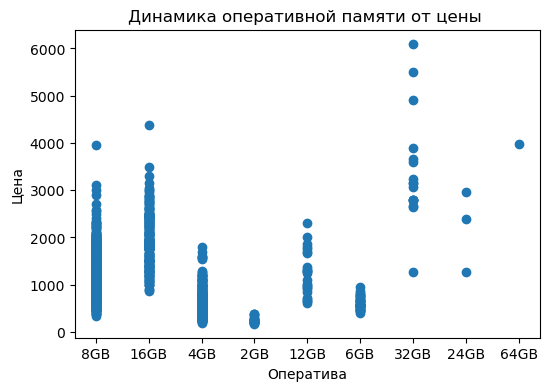

In [57]:
plt.figure(figsize=(6,4))
plt.scatter(df['Ram'],df['Price_euros']);
plt.title("Динамика оперативной памяти от цены ");


plt.ylabel("Цена");
plt.xlabel("Оператива");

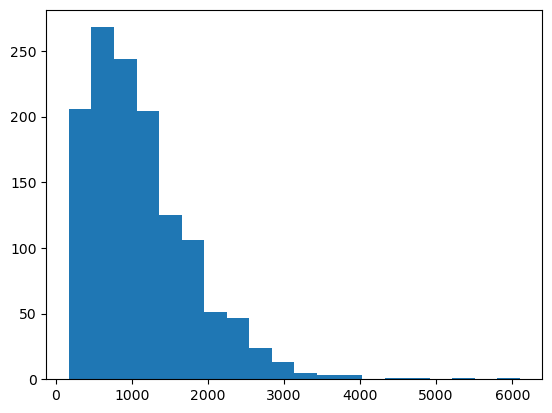

In [108]:
plt.hist(df['Price_euros'], bins = 20);

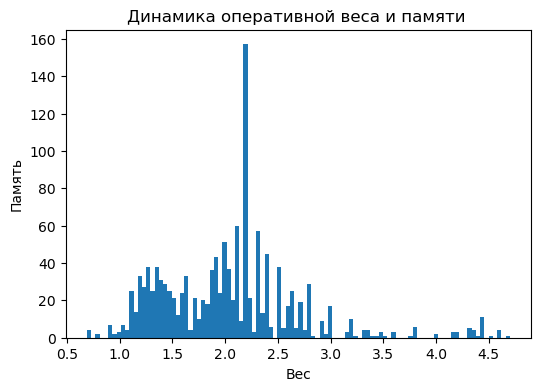

In [109]:

plt.figure(figsize=(6,4))
plt.hist(df['Weight'], bins =100);
plt.title("Динамика оперативной веса и памяти ");


plt.ylabel("Память");
plt.xlabel("Вес");

2.1 Изучите распределение типов носителя

2.2 Изучите распределение компаний производителей

2.3 Изучите распределение операционной системы

2.4 Изучите распределение компаний производителей CPU

Постройте график
Сделайте выводы

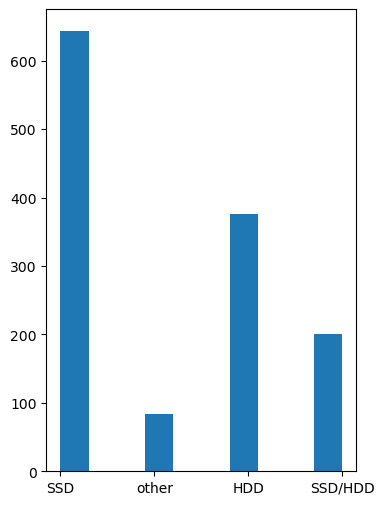

In [89]:
plt.figure(figsize=(4,6))
plt.hist(df.Memory_Type);

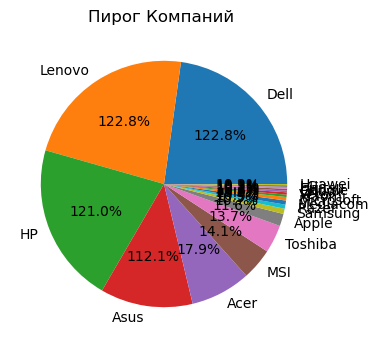

In [121]:
plt.figure(figsize=(6,4))
#Сначала выбираем серию
ser = df.Company.value_counts()
name = ser.index
value = ser.values

plt.pie(value,labels= name, autopct='1%.1f%%');
plt.title("Пирог Компаний ");


# plt.ylabel("Память");
# plt.xlabel("Вес");

In [204]:
from matplotlib.patches import Polygon

In [216]:
df.Company.dtype

dtype('O')

In [225]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
plt.hist(df['Company'],bins= 30);
plt.title('Гистограмма')
plt.xlabel('Компании')
plt.ylabel("Кол-во");

TypeError: 'int' object is not callable

<Figure size 1000x4000 with 0 Axes>

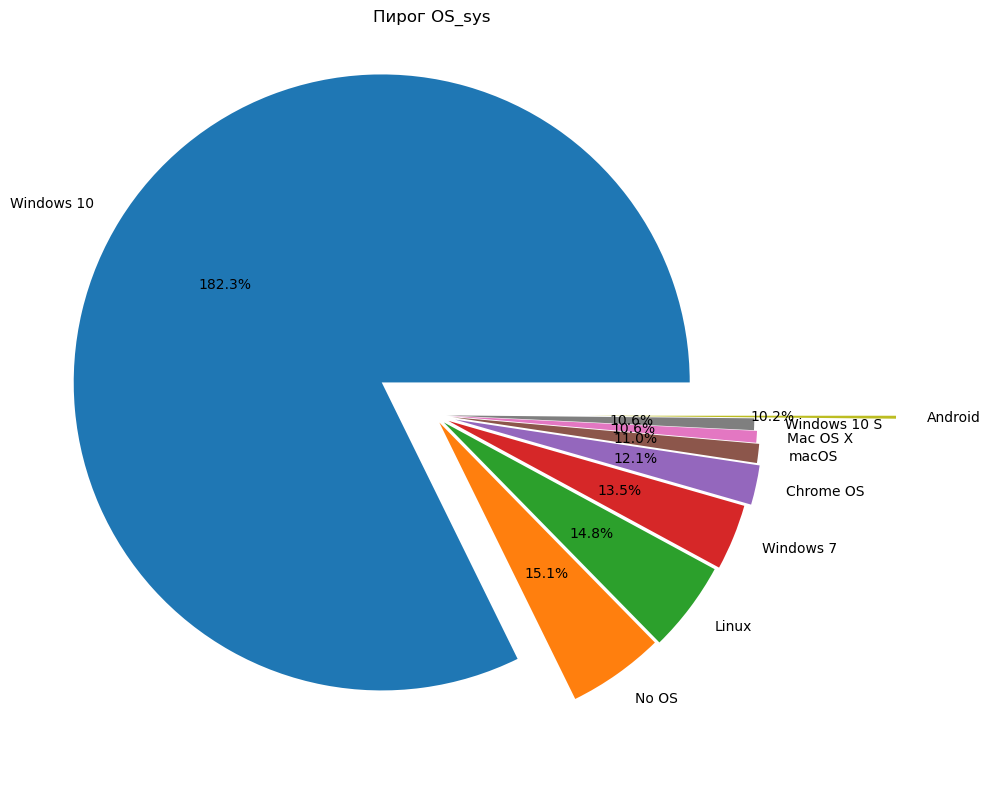

In [233]:
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]#Список отдалени кусочков 
plt.figure(figsize=(11,10))
#Сначала выбираем серию
ser = df["OpSys"].value_counts()
name = ser.index
value = ser.values

plt.pie(value,labels= name, autopct='1%.1f%%', explode = expl);#exp
plt.title("Пирог OS_sys ");

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

3.2 Постройте график в относительных величинах

In [99]:
df_3 = pd.crosstab(index = df.Company, columns = df.Cpu_Company)
df_3.drop(columns = 'Samsung', inplace =True)
df_3 = df_3.reset_index()
df_3

# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(df_3['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, df_3['Intel'], width=w)
plt.bar(n_ticks + offset, df_3['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, df_3['Company'], rotation = 45); # добавляем метки делений

AttributeError: 'DataFrame' object has no attribute 'Cpu_Company'

3.2 Постройте график в относительных величинах( в процентах)

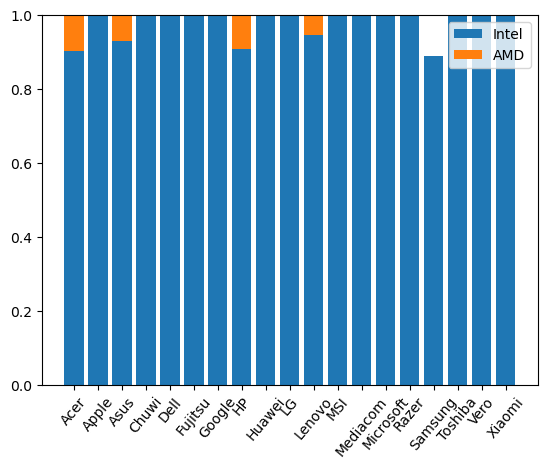

In [66]:
df_3_n = pd.crosstab(index = df.Company, columns = df.Cpu_Company, normalize = 'index') #normalize = index сделает в долях(процентах) 
df_3_n.drop(columns = 'Samsung', inplace =True)
df_3_n = df_3_n.reset_index()
plt.bar(df_3_n['Company'], df_3_n['Intel'])
plt.bar(df_3_n['Company'], df_3_n['AMD'],bottom = df_3_n['Intel'])
plt.legend(['Intel','AMD']);
plt.xticks(rotation =50);


4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

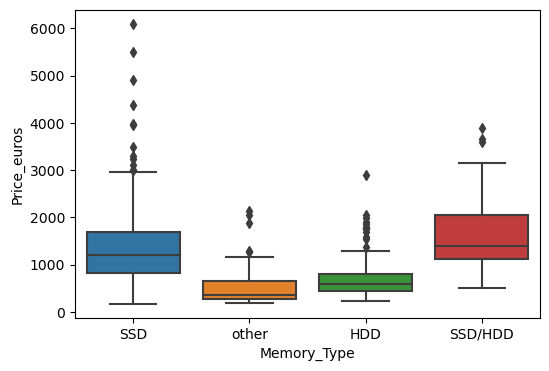

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df.Memory_Type, y = df.Price_euros, );#whis=6

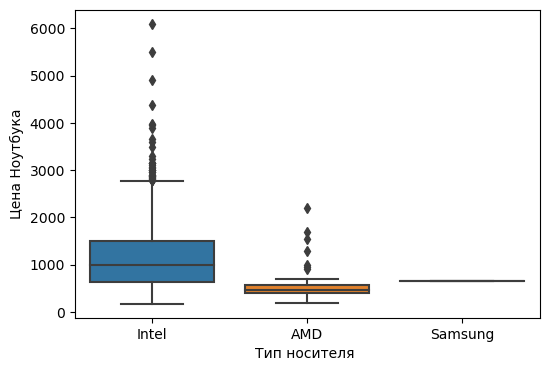

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df.Cpu_Company, y = df.Price_euros, )
plt.xlabel("Тип носителя ");
Lista = plt.ylabel('Цена Ноутбука');

In [89]:
Lista = ["Memory_Amount", "Inches","Price_euros"]
new_df = df[Lista]
a = new_df.corr()
a

,Memory_Amount,Inches,Price_euros
Memory_Amount,1.000000,0.523314,0.156943
Inches,0.523314,1.000000,0.068197
Price_euros,0.156943,0.068197,1.000000
